In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [14]:
# define filenames
from config import NC_FILE_NAMES, DF_LABELS, NC_ATTRIBUTES
base_dir = '/mnt/lts/nfs_fs02/sadow_lab/personal/yusukemh/pi_casc/'
raw_data_dir = os.path.join(base_dir, 'raw_datasets/')
dest_dir = os.path.join(base_dir, 'processed_datasets/')

filename_skn_locations = os.path.join(raw_data_dir, 'SKNlocations.csv')
filename_stations = os.path.join(raw_data_dir, 'FilledDataset2012.xlsx')
dest_filename = os.path.join(dest_dir, 'dataset_6grid.csv')

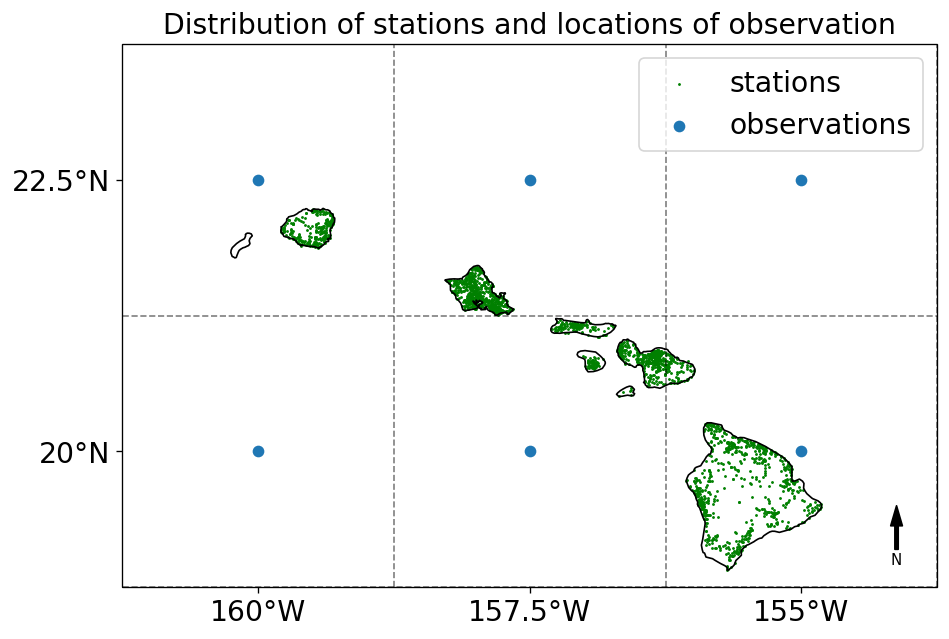

In [ ]:
# Visualize the locations of the stations
fontsize = 17
df_locations = pd.read_csv(filename_skn_locations)
lat_hawaii = [15, 17.5, 20, 22.5, 25]
lon_hawaii = [-162.5, -160, -157.5, -155, -152.5]
xx, yy = np.meshgrid(lon_hawaii, lat_hawaii)

plt.figure(figsize=(10, 6), dpi=120)
ax = plt.axes(projection=ccrs.PlateCarree())

xmin, xmax = -162.5, -152.5
ymin, ymax = 15 + 2.5, 25

ax.tick_params(axis='both', which='major', labelsize=fontsize)

ax.set_xticks(np.arange(xmin, xmax+1, 2.5))
ax.set_yticks(np.arange(ymin, ymax+1, 2.5))

ax.set_xlim(xmin + 1.25, xmax - 1.25)
ax.set_ylim(ymin + 1.25, ymax - 1.25)


lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

stations = plt.scatter(df_locations["Lon_DD"], df_locations["Lat_DD"], s=0.5, marker='o', color="green", label="stations")
observations = plt.scatter(xx, yy, label="observations")
plt.vlines(x=np.arange(xmin, xmax+1, 2.5) - 1.25, ymin=ymin, ymax=ymax, color="k", linewidth=1, linestyle="--", alpha=0.5)
plt.hlines(y=np.arange(ymin, ymax+1, 2.5) - 1.25 , xmin=xmin, xmax=xmax, color="k", linewidth=1, linestyle="--", alpha=0.5)
plt.title("Distribution of stations and locations of observation", fontsize=(fontsize))
plt.legend(fontsize=fontsize)
ax.coastlines(resolution='10m')

x, y, arrow_length = 0.95, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=2, headwidth=7),
            ha='center', va='center', fontsize=9,
            xycoords=ax.transAxes)
print()
plt.savefig('plots/02_stations_and_obs')

In [23]:
NC_FILE_NAMES[8]

'shum_x_uwnd.700.mon.mean.nc'

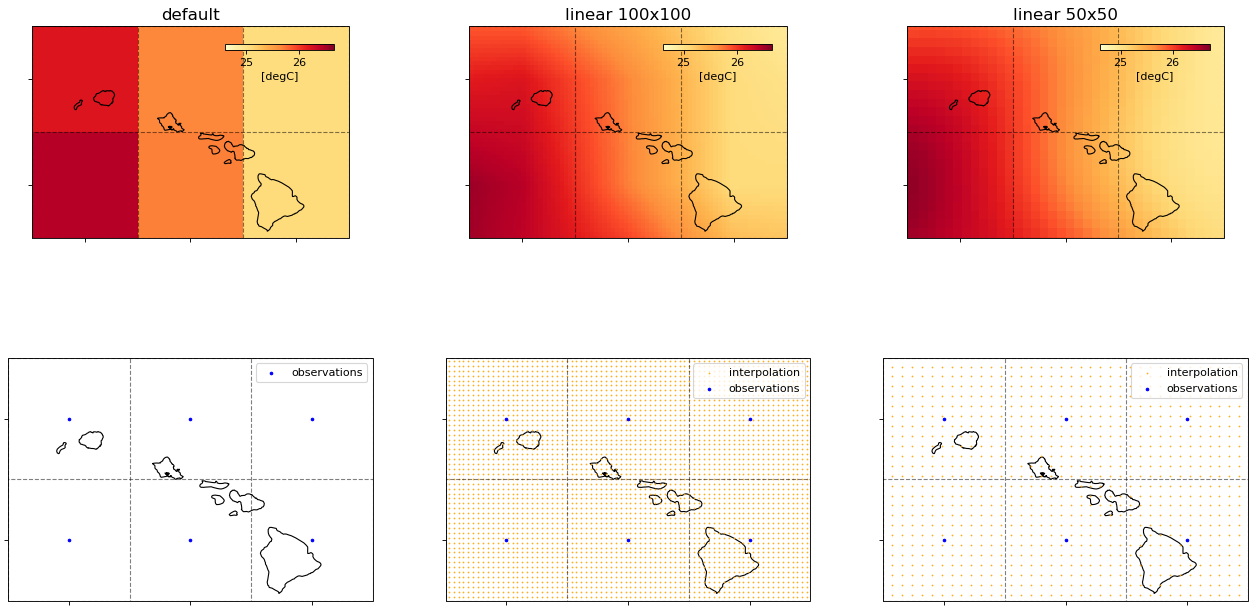

In [111]:
# load a sample dataset
i = 14
ds_air2m = xr.open_dataset(os.path.join(raw_data_dir, f"reanalysis_data/{NC_FILE_NAMES[i]}"))
data_matrix = ds_air2m.loc[dict(time="1948-06-01", lon=np.array(lon_hawaii) + 360, lat=lat_hawaii)][NC_ATTRIBUTES[i]]

# apply linear interpolation
data_matrix_interp_100 = data_matrix.interp(
    lat=np.linspace(lat_hawaii[0],
                    lat_hawaii[-1],
                    100
                   ),
    lon=np.linspace(lon_hawaii[0],
                    lon_hawaii[-1],
                    100
    ) + 360,
    method="linear"
)

data_matrix_interp_50 = data_matrix.interp(
    lat=np.linspace(lat_hawaii[0],
                    lat_hawaii[-1],
                    50
                   ),
    lon=np.linspace(lon_hawaii[0],
                    lon_hawaii[-1],
                    50
    ) + 360,
    method="cubic"
)

fig, axs = plt.subplots(
    2, 3, figsize=(20, 10), dpi=80,
    subplot_kw={'projection': ccrs.PlateCarree()},
    gridspec_kw={'wspace': 0.2, 'hspace': 0, 'width_ratios': [1, 1, 1]}
)

data_matrix.plot(
    ax=axs[0, 0],
    add_colorbar=True,
    cmap='YlOrRd',
    cbar_kwargs={
        'shrink':0.3,
        'orientation':'horizontal',
        'anchor':(0.85, 7),
        'label': '[degC]'
    })
data_matrix_interp_100.plot(
    ax=axs[0, 1],
    add_colorbar=True,
    cmap='YlOrRd',
    cbar_kwargs={
        'shrink':0.3, 'orientation':'horizontal', 'anchor':(0.85, 7),
        'label': '[degC]'
    })
data_matrix_interp_50.plot(
    ax=axs[0, 2],
    add_colorbar=True,
    cmap='YlOrRd',
    cbar_kwargs={
        'shrink':0.3, 'orientation':'horizontal', 'anchor':(0.85, 7),
        'label': '[degC]'
    })

for ax in axs.flatten():
    ax.set_xticks(np.arange(xmin, xmax+1, 2.5))
    ax.set_yticks(np.arange(ymin, ymax+1, 2.5))
    ax.set_ylabel("")

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin + 1.25, xmax - 1.25)
    ax.set_ylim(ymin + 1.25, ymax - 1.25)
    ax.coastlines(resolution='10m')
    ax.grid(linewidth=2, color='black', linestyle='--')
    ax.vlines(x=np.arange(xmin, xmax+1, 2.5) - 1.25, ymin=ymin, ymax=ymax, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.hlines(y=np.arange(ymin, ymax+1, 2.5) - 1.25 , xmin=xmin, xmax=xmax, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel("")
axs[0, 0].set_title("default", fontsize=(15))
axs[0, 1].set_title("linear 100x100", fontsize=(15))
axs[0, 2].set_title("linear 50x50", fontsize=(15))

# lower plots
xx, yy = np.meshgrid(lon_hawaii, lat_hawaii)

xx_interp_50, yy_interp_50 = np.meshgrid(
    np.linspace(lon_hawaii[0], lon_hawaii[-1], 50),
    np.linspace(lat_hawaii[0], lat_hawaii[-1], 50)
)

xx_interp_100, yy_interp_100 = np.meshgrid(
    np.linspace(lon_hawaii[0], lon_hawaii[-1], 100),
    np.linspace(lat_hawaii[0], lat_hawaii[-1], 100)
)

interpolation = axs[1, 1].scatter(xx_interp_100, yy_interp_100, s=0.3, label="interpolation", color='orange')
interpolation = axs[1, 2].scatter(xx_interp_50, yy_interp_50, s=0.3, label="interpolation", color='orange')

for i in range(3):
    observations = axs[1, i].scatter(xx, yy, s=5, label="observations", color='blue')
    axs[1, i].legend(loc=1)

print()

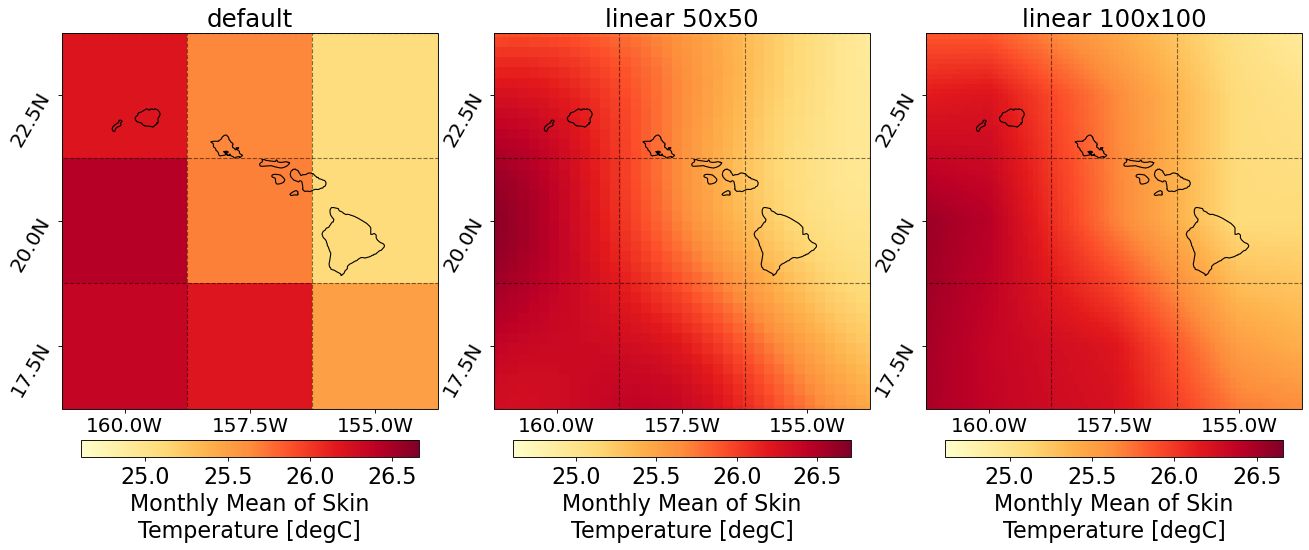

In [266]:
# load a sample dataset
i = 14
ds_air2m = xr.open_dataset(os.path.join(raw_data_dir, f"reanalysis_data/{NC_FILE_NAMES[i]}"))
data_matrix = ds_air2m.loc[dict(time="1948-06-01", lon=np.array(lon_hawaii) + 360, lat=lat_hawaii)][NC_ATTRIBUTES[i]]

# apply linear interpolation
data_matrix_interp_100 = data_matrix.interp(
    lat=np.linspace(lat_hawaii[0],
                    lat_hawaii[-1],
                    100
                   ),
    lon=np.linspace(lon_hawaii[0],
                    lon_hawaii[-1],
                    100
    ) + 360,
    method="linear"
)

data_matrix_interp_50 = data_matrix.interp(
    lat=np.linspace(lat_hawaii[0],
                    lat_hawaii[-1],
                    50
                   ),
    lon=np.linspace(lon_hawaii[0],
                    lon_hawaii[-1],
                    50
    ) + 360,
    method="cubic"
)

fig, axs = plt.subplots(
    1, 3, figsize=(20, 10), dpi=80,
    subplot_kw={'projection': ccrs.PlateCarree()},
    gridspec_kw={'wspace': 0.15, 'hspace': 0, 'width_ratios': [1, 1, 1]}
)

cbar_fontsize=20
im = data_matrix.plot(
    ax=axs[0],
    add_colorbar=True,
    cmap='YlOrRd',
    cbar_kwargs={
        'shrink':0.9,
        'orientation':'horizontal',
        'anchor':(0.5, 1.8),
    })
cbar = im.colorbar
cbar.ax.tick_params(labelsize=cbar_fontsize)
cbar.ax.set_xlabel(cbar.ax.get_xlabel(), fontsize=cbar_fontsize)

im = data_matrix_interp_50.plot(
    ax=axs[1],
    add_colorbar=True,
    cmap='YlOrRd',
    cbar_kwargs={
        'shrink':0.9,
        'orientation':'horizontal',
        'anchor':(0.5, 1.8),
    })
cbar = im.colorbar
cbar.ax.tick_params(labelsize=cbar_fontsize)
cbar.ax.set_xlabel(cbar.ax.get_xlabel(), fontsize=cbar_fontsize)

im = data_matrix_interp_100.plot(
    ax=axs[2],
    add_colorbar=True,
    cmap='YlOrRd',
    cbar_kwargs={
        'shrink':0.9,
        'orientation':'horizontal',
        'anchor':(0.5, 1.8),
    })
cbar = im.colorbar
cbar.ax.tick_params(labelsize=cbar_fontsize)
cbar.ax.set_xlabel(cbar.ax.get_xlabel(), fontsize=cbar_fontsize)

for ax in axs.flatten():
    ax.set_xticks(np.arange(xmin, xmax+1, 2.5))
    ax.set_yticks(np.arange(ymin, ymax+1, 2.5))
    ax.set_ylabel("")

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(xmin + 1.25, xmax - 1.25)
    ax.set_ylim(ymin + 1.25, ymax - 1.25)
    ax.coastlines(resolution='10m')
    ax.grid(linewidth=2, color='black', linestyle='--')
    ax.vlines(x=np.arange(xmin, xmax+1, 2.5) - 1.25, ymin=ymin, ymax=ymax, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.hlines(y=np.arange(ymin, ymax+1, 2.5) - 1.25 , xmin=xmin, xmax=xmax, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.set_xticklabels([f'{abs(lat)}W' for lat in np.arange(xmin, xmax+1, 2.5)], fontsize=cbar_fontsize-2)
    ax.set_yticklabels([f'{abs(lon)}N' for lon in np.arange(ymin, ymax+1, 2.5)], fontsize=cbar_fontsize-2, rotation='60')
    ax.set_xlabel("")
axs[0].set_title("default", fontsize=cbar_fontsize+2)
axs[1].set_title("linear 50x50", fontsize=cbar_fontsize+2)
axs[2].set_title("linear 100x100", fontsize=cbar_fontsize+2)
print()
fig.savefig('plots/02_interp_heatmap')

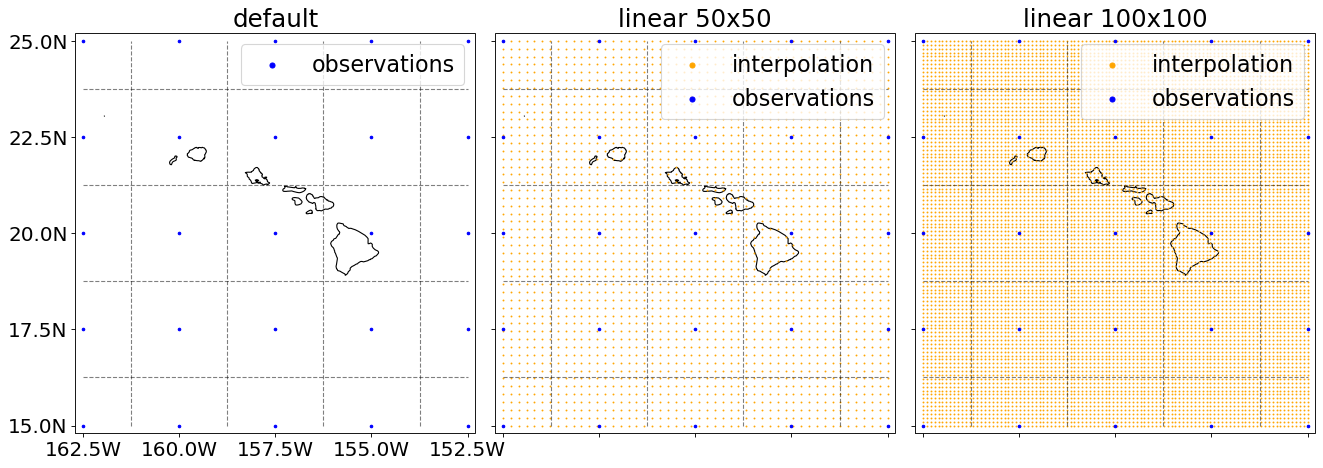

In [276]:
# load a sample dataset
fig, axs = plt.subplots(
    1, 3, figsize=(20, 10), dpi=80,
    subplot_kw={'projection': ccrs.PlateCarree()},
    gridspec_kw={'wspace': 0.05, 'hspace': 0, 'width_ratios': [1, 1, 1]}
)
margin = 0.2
xmin, xmax = -162.5, -152.5
ymin, ymax = 15, 25


for ax in axs.flatten():
    ax.set_xticks(np.arange(xmin, xmax + 1, 2.5))
    ax.set_yticks(np.arange(ymin, ymax + 1, 2.5))
    ax.set_ylabel("")

    ax.set_xlim(xmin - margin, xmax + margin)
    ax.set_ylim(ymin - margin, ymax + margin)
    ax.coastlines(resolution='10m')
    ax.grid(linewidth=2, color='black', linestyle='--')
    ax.vlines(x=np.arange(xmin, xmax+1, 2.5) - 1.25, ymin=ymin, ymax=ymax, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.hlines(y=np.arange(ymin, ymax+1, 2.5) - 1.25 , xmin=xmin, xmax=xmax, color="k", linewidth=1, linestyle="--", alpha=0.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # ax.set_xticklabels([f'{abs(lat)}W' for lat in np.arange(xmin, xmax+1, 2.5)], fontsize=cbar_fontsize-2)
    # ax.set_yticklabels([f'{abs(lon)}N' for lon in np.arange(ymin, ymax+1, 2.5)], fontsize=cbar_fontsize-2, rotation='0')
    ax.set_xlabel("")
axs[0].set_xticklabels([f'{abs(lat)}W' for lat in np.arange(xmin, xmax+1, 2.5)], fontsize=cbar_fontsize-2)
axs[0].set_yticklabels([f'{abs(lon)}N' for lon in np.arange(ymin, ymax+1, 2.5)], fontsize=cbar_fontsize-2, rotation='0')

axs[0].set_title("default", fontsize=cbar_fontsize+2)
axs[1].set_title("linear 50x50", fontsize=cbar_fontsize+2)
axs[2].set_title("linear 100x100", fontsize=cbar_fontsize+2)

# lower plots
xx, yy = np.meshgrid(lon_hawaii, lat_hawaii)

xx_interp_50, yy_interp_50 = np.meshgrid(
    np.linspace(lon_hawaii[0], lon_hawaii[-1], 50),
    np.linspace(lat_hawaii[0], lat_hawaii[-1], 50)
)

xx_interp_100, yy_interp_100 = np.meshgrid(
    np.linspace(lon_hawaii[0], lon_hawaii[-1], 100),
    np.linspace(lat_hawaii[0], lat_hawaii[-1], 100)
)

interpolation = axs[1].scatter(xx_interp_50, yy_interp_50, s=0.5, label="interpolation", color='orange')
interpolation = axs[2].scatter(xx_interp_100, yy_interp_100, s=0.5, label="interpolation", color='orange')


for i in range(3):
    observations = axs[i].scatter(xx, yy, s=5, label="observations", color='blue')
    lgnd = axs[i].legend(loc=1, fontsize=cbar_fontsize, markerscale=2)
    lgnd.legendHandles[0]._sizes = [20]
    lgnd.legendHandles[0]._sizes = [20]
fig.savefig('plots/02_interpolation')

In [72]:
df.groupby('skn').size()

skn
1.00       484
1.20        55
2.00       775
2.10        32
2.11        16
          ... 
1143.00    720
1144.00    720
1145.00    778
1146.00     95
1147.00     60
Length: 1992, dtype: int64

In [83]:
df_filled = df[df['filled'] == True].groupby('skn').size().reset_index().sort_values('skn').rename(columns={0: 'filled'})

In [84]:
df_actual = df[df['filled'] == False].groupby('skn').size().reset_index().sort_values('skn').rename(columns={0: 'actual'})

In [89]:
df_all = pd.merge(left=df_filled, right=df_actual, on='skn', how='outer').fillna(0)

In [90]:
df_all['total'] = df_all['filled'] + df_all['actual']

In [142]:
df_all['percentage'] = df_all['filled'] / df_all['total']

In [143]:
df_all

,skn,filled,actual,total,percentage
0,1.00,468.0,16.0,484.0,0.966942
1,2.00,266.0,509.0,775.0,0.343226
2,2.20,680.0,40.0,720.0,0.944444
3,2.25,589.0,131.0,720.0,0.818056
4,2.26,601.0,119.0,720.0,0.834722
...,...,...,...,...,...
1987,1131.70,0.0,121.0,121.0,0.000000
1988,1132.00,0.0,39.0,39.0,0.000000
1989,1132.10,0.0,245.0,245.0,0.000000
1990,1146.00,0.0,95.0,95.0,0.000000


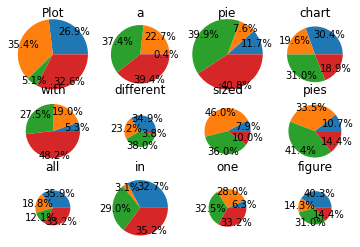

In [152]:
t = "Plot a pie chart  with different sized pies all in one figure"
X  = np.random.rand(12,4)*30
r = np.random.rand(12)*0.8+0.6

fig, axes= plt.subplots(3, 4)

for i, ax in enumerate(axes.flatten()):
    x = X[i,:]/np.sum(X[i,:])
    ax.pie(x, radius = r[i], autopct="%.1f%%", pctdistance=0.9)
    ax.set_title(t.split()[i])

plt.show()

In [157]:
r

array([1.37162344, 1.14506033, 1.37785   , 1.08885139, 1.06041817,
       0.61859284, 0.90143536, 1.03459927, 0.68393431, 1.08339539,
       0.73872463, 0.65166564])

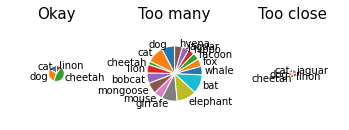

In [162]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig, axs = plt.subplots(1, 3)#, figsize=(15, 5))
labels = 'cat', 'dog', 'cheetah', 'linon'
sizes = [15, 30, 45, 10]

# fig1, ax1 = plt.subplots()
axs[0].pie(sizes, startangle=90, labels=labels, radius=0.2, wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,})
# axs[0].axis('equal')

labels = [
        'dog', 'cat', 'cheetah', 'lion',
        'bobcat', 'mongoose', 'mouse', 'girrafe',
        'elephant', 'bat', 'whale', 'fox',
        'racoon', 'hippo', 'jaguar', 'hyena'
    ]

sizes = [15, 20, 4, 10, 12, 13, 10, 18, 23, 22, 10, 9, 8, 7, 8 ,9]
axs[1].pie(sizes, startangle=90, labels=labels, radius= 0.7, wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,})
# axs[1].axis('equal')

labels = 'cat', 'dog', 'cheetah', 'linon', 'jaguar'
sizes = [23, 26, 24, 27, 30]
axs[2].pie(sizes, radius=0.1, startangle=90, labels=labels, wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,})
# axs[2].axis('equal')
axs[0].set_title('Okay', fontsize=15)
axs[1].set_title('Too many', fontsize=15)
axs[2].set_title('Too close', fontsize=15)
# fig.savefig('bad_pie')
print()

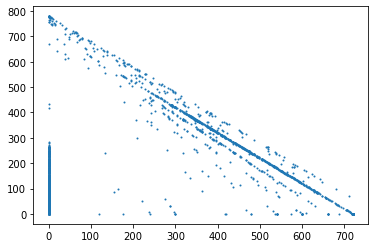

In [163]:
fig, ax = plt.subplots(1)
ax.scatter(df_all['filled'], df_all['actual'], s=1)
# ax.scatter(df_all['actual'], df_all['filled'], s=1)

In [109]:
df_ready = df_all.sort_values(by=['total', 'actual'], ascending=False).reset_index(drop=True)

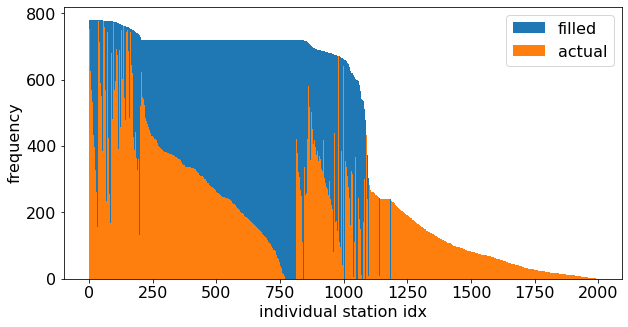

In [127]:
fontsize=16
fig, ax = plt.subplots(1, figsize=(10,5))
ax.bar(x=df_ready.index, height=df_ready['total'], width=1, label='filled')
ax.bar(x=df_ready.index, height=df_ready['actual'], width=1, label='actual')
ax.legend()
ax.set_ylabel('frequency', fontsize=fontsize)
# ax.set_xticks([])
ax.set_xlabel('individual station idx', fontsize=fontsize)
plt.legend(fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
print()

In [279]:
df = pd.read_csv('/home/yusukemh/sadow_lts/personal/yusukemh/pi_casc/processed_datasets/dataset_6grid.csv')

In [300]:
skn_with_only_filled_data = df.groupby('skn').mean()

In [310]:
skn_with_only_filled_data.shape

(1992, 120)

In [307]:
skn_with_only_filled_data[skn_with_only_filled_data['filled']== 1]#.shape

,year,month,data_in,filled,lat,lon,air2m,air1000_500,hgt500,hgt1000,...,skt_4,skt_5,slp_0,slp_1,slp_2,slp_3,slp_4,slp_5,elevation,season_wet
skn,,,,,,,,,,,,,,,,,,,,,
12.1,1977.500000,6.500000,3.946208,1.0,19.133658,-155.535552,296.624731,30.308333,5848.495015,139.549417,...,24.887341,24.541713,1015.641806,1015.659924,1015.963601,1016.901921,1016.747819,1016.768425,330.0,0.500000
26.0,1977.500000,6.500000,5.898116,1.0,19.490313,-155.895546,296.624731,30.308333,5848.495015,139.549417,...,24.887341,24.541713,1015.641806,1015.659924,1015.963601,1016.901921,1016.747819,1016.768425,2100.0,0.500000
28.1,1977.500000,6.333333,3.031944,1.0,19.473369,-155.918879,296.570367,30.268684,5848.807509,140.574898,...,24.831890,24.480776,1015.756563,1015.773760,1016.079721,1017.020931,1016.871194,1016.897981,15.0,0.444444
29.1,1977.224299,5.863551,5.079421,1.0,19.506978,-155.917213,296.335717,30.416728,5842.100191,140.611778,...,24.510156,24.185845,1015.765902,1015.793254,1016.103436,1017.020339,1016.872834,1016.883884,1580.0,0.669159
29.2,1977.500000,6.500000,4.627621,1.0,19.508645,-155.920546,296.624731,30.308333,5848.495015,139.549417,...,24.887341,24.541713,1015.641806,1015.659924,1015.963601,1016.901921,1016.747819,1016.768425,1500.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092.3,1977.500000,6.500000,8.230517,1.0,22.127860,-159.373869,297.100373,30.982232,5839.691044,145.037113,...,24.777194,24.451260,1015.526316,1015.561909,1015.870101,1016.759775,1016.613690,1016.623174,800.0,0.600000
1104.1,1977.500000,6.636364,4.386273,1.0,22.078444,-159.337204,297.291132,30.917969,5844.533003,145.639223,...,24.939302,24.591877,1015.546950,1015.567873,1015.870930,1016.800881,1016.647251,1016.664440,80.0,0.545455
1107.2,1977.500000,6.500000,4.518440,1.0,22.093973,-159.323871,297.254676,30.874499,5845.030478,146.535462,...,24.887341,24.541713,1015.641806,1015.659924,1015.963601,1016.901921,1016.747819,1016.768425,190.0,0.500000


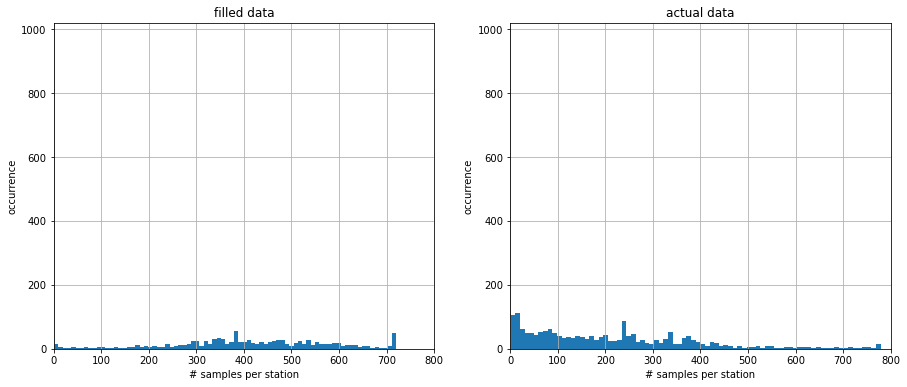

In [312]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
df[df['filled'] == True].groupby('skn').size().hist(ax=axs[0],bins=80)
df[df['filled'] == False].groupby('skn').size().hist(ax=axs[1],bins=80)
# df.groupby('skn').size().hist(ax=axs[2], bins=300)


axs[0].set_title('filled data')
axs[1].set_title('actual data')

for ax in axs:
    ax.set_xlabel('# samples per station')
    ax.set_ylabel('occurrence')
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 1020)

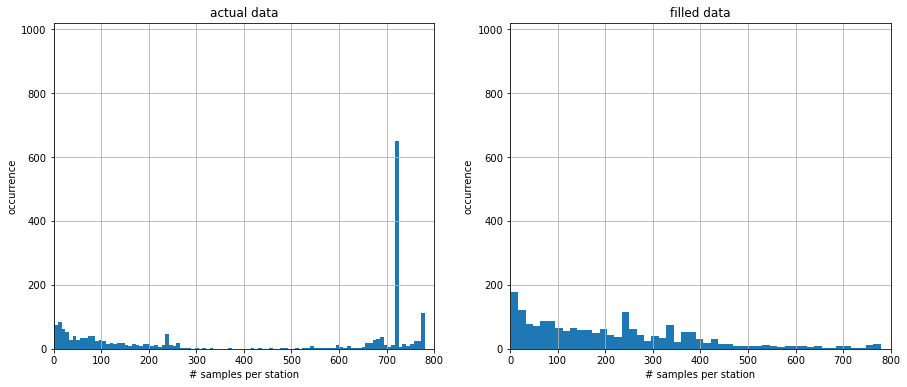

In [388]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
# df[df['filled'] == True].groupby('skn').size().hist(ax=axs[0],bins=80)
df[df['filled'] == False].groupby('skn').size().hist(ax=axs[1],bins=50)
df.groupby('skn').size().hist(ax=axs[0], bins=100)


axs[0].set_title('actual data')
axs[1].set_title('filled data')

for ax in axs:
    ax.set_xlabel('# samples per station')
    ax.set_ylabel('occurrence')
    ax.set_xlim(0, 800)
    ax.set_ylim(0, 1020)

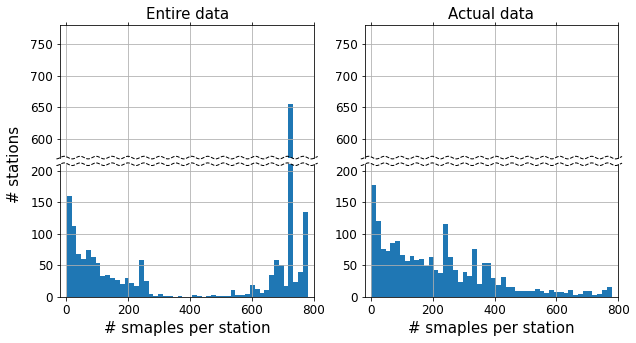

In [489]:
fig = plt.figure(figsize=(10, 5))
axd = fig.subplot_mosaic('12;34', gridspec_kw={'hspace': 0.05})

cutoff = 210
title_fontsize=15

df.groupby('skn').size().hist(ax=axd['1'], bins=50)
df.groupby('skn').size().hist(ax=axd['3'], bins=50)
df[df['filled'] == False].groupby('skn').size().hist(ax=axd['2'],bins=50)
df[df['filled'] == False].groupby('skn').size().hist(ax=axd['4'],bins=50)

axd['1'].set_title('Entire data', fontsize=title_fontsize)
axd['2'].set_title('Actual data', fontsize=title_fontsize)
d = .015
for ax in [axd['1'], axd['2']]: # top axes
    ax.spines['bottom'].set_visible(False)
    ax.set_ylim(570, 570 + cutoff)
    ax.set_xlim(-20, 800)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)
    # add curvy line to indicate split
    x_curve = np.linspace(-d, 1+d, 200)
    y_curve = 0.01 * np.sin(100*x_curve)
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot(x_curve, y_curve, **kwargs, linewidth=1, linestyle='--')
    ax.tick_params(axis='both', which='major', labelsize=title_fontsize-3)

axd['3'].set_ylabel('# stations', fontsize=title_fontsize)
axd['3'].yaxis.set_label_coords(-0.15, 1)# move the label vertically in the middle
for ax in [axd['3'], axd['4']]: # bottom axes
    ax.spines['top'].set_visible(False)
    ax.set_ylim(0, cutoff)
    ax.set_xlim(-20, 800)
    ax.xaxis.tick_bottom()
    x_curve = np.linspace(-d, 1+d, 200)
    y_curve = 1 - 0.01 * np.sin(100*x_curve + np.pi)
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot(x_curve, y_curve, **kwargs, linewidth=1, linestyle='--')
    ax.set_xlabel('# smaples per station', fontsize=title_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=title_fontsize-3)
fig.savefig('plots/02_rainfall_hist')

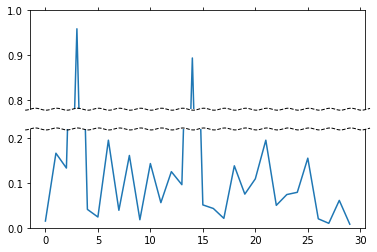

In [363]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
x_curve = np.linspace(-d, 1+d, 200)
y_curve = 0.01 * np.sin(100*x_curve)
ax.plot(x_curve, y_curve, **kwargs, linewidth=1, linestyle='--')

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
x_curve = np.linspace(-d, 1+d, 200)
y_curve = 1 - 0.01 * np.sin(100*x_curve + np.pi)
ax2.plot(x_curve, y_curve, **kwargs, linewidth=1, linestyle='--')
plt.show()